In [2]:
%matplotlib inline
import csv
import fnmatch
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tqdm import tqdm
import random
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.cluster import KMeans
import pandas as pd

lfw_path = "../dataset"
    
images = []
for root, dirnames, filenames in os.walk(lfw_path):
    for filename in fnmatch.filter(filenames, '*.jpg'):
        images.append(os.path.join(root, filename))

for i, image in tqdm(enumerate(images)):
    if (os.stat(image).st_size < 500):
        del images[i]
        
n = len(images)
print("loaded %d art images" % n)

/home/tait/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
18807it [00:00, 556084.65it/s]

loaded 18807 art images


In [4]:
w = h = 100

X = np.zeros((n, w*h*1))
for i, img in tqdm(enumerate(images)):
    im = Image.open(img).convert("L")
    width, height = im.size
    left = (width - w)/2
    top = (height - h)/2
    right = (width + w)/2
    bottom = (height + h)/2
    im = im.crop((left, top, right, bottom))
    pixels = im.getdata()
    X[i, :] = np.array(pixels)

18807it [00:25, 742.23it/s]


In [5]:
#make clusters for each one. Crucial step because this actually captures the composition within an image
kmeans = KMeans(n_clusters=3)
labels = []

clusterlength = 200
i = 0
while i < clusterlength:
    img = X[int(n*random.random())]
    xp1 = img.reshape(w,h)
    xp2 = xp1.reshape(w*h, 1)
    kmeans.fit(xp2)
    label = kmeans.labels_
    labels.append(label)
    i = i + 1
# for a full cycle: 
# for index, img in tqdm(enumerate(X)):
#     xp1 = img.reshape(w,h)
#     xp2 = xp1.reshape(w*h, 1)
#     kmeans.fit(xp2)
#     label = kmeans.labels_
#     labels.append(label)

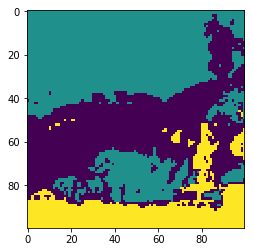

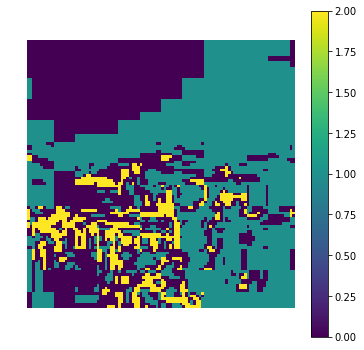

In [6]:
plt.imshow(labels[28].reshape(w,h))
im3=labels[12].reshape(w,h)
plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(im3)
plt.colorbar()
plt.show()

In [7]:
print(labels[0].shape)
frame = pd.DataFrame(labels)
frame.to_csv('../data/compositions.csv')

(10000,)


In [31]:
np.savetxt('1.out', labels, fmt='%i', delimiter=',')